## Cuatro curvas en ventanas separadas

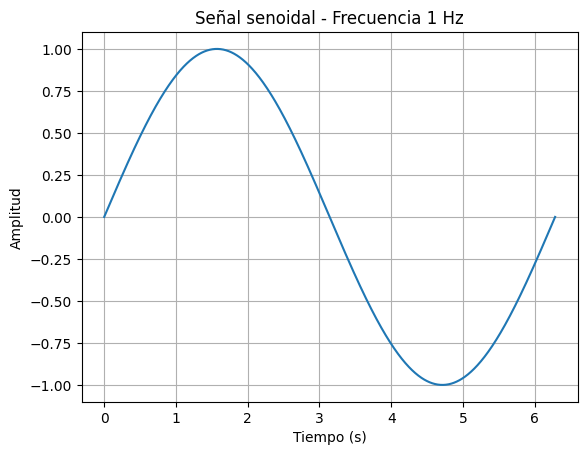

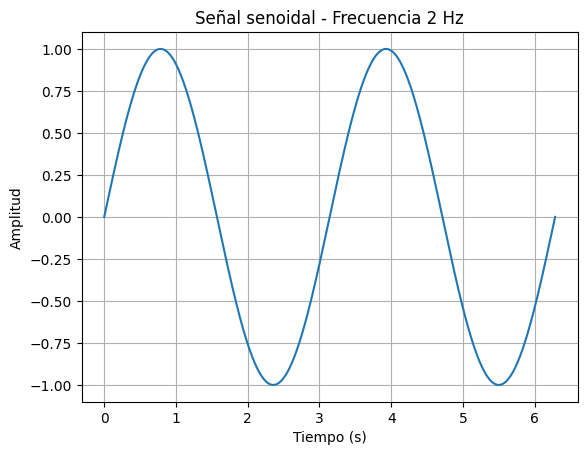

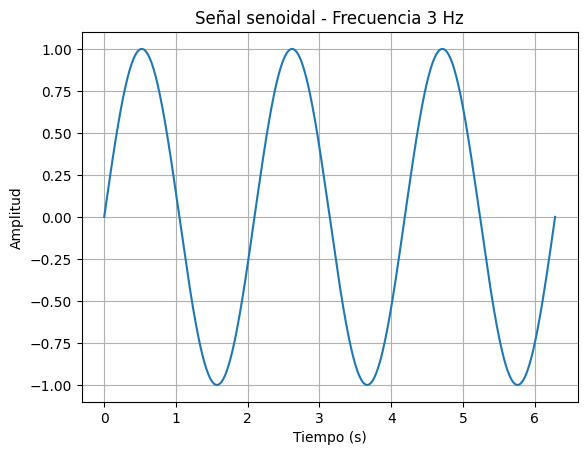

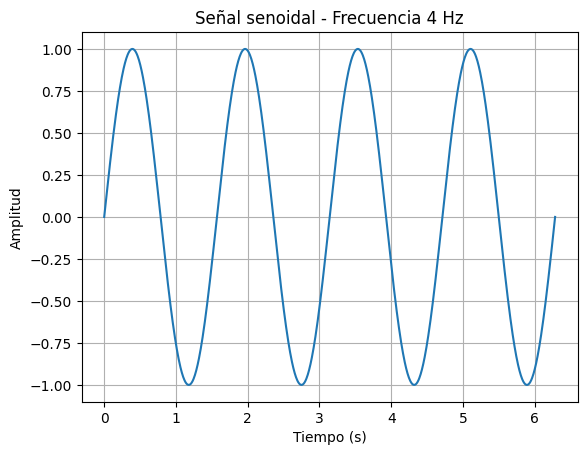

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Vector de tiempo
t = np.linspace(0, 2*np.pi, 1000)

frecuencias = [1, 2, 3, 4]

for f in frecuencias:
    plt.figure()
    plt.plot(t, np.sin(f*t))
    plt.title(f"Señal senoidal - Frecuencia {f} Hz")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.show()


## Todas las curvas sobrepuestas en una sola ventana

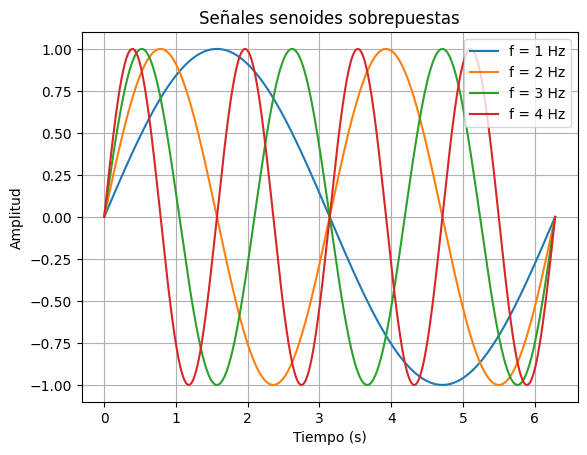

In [57]:
plt.figure()

for f in frecuencias:
    plt.plot(t, np.sin(f*t), label=f"f = {f} Hz")

plt.title("Señales senoides sobrepuestas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


## Una sola ventana usando subplot

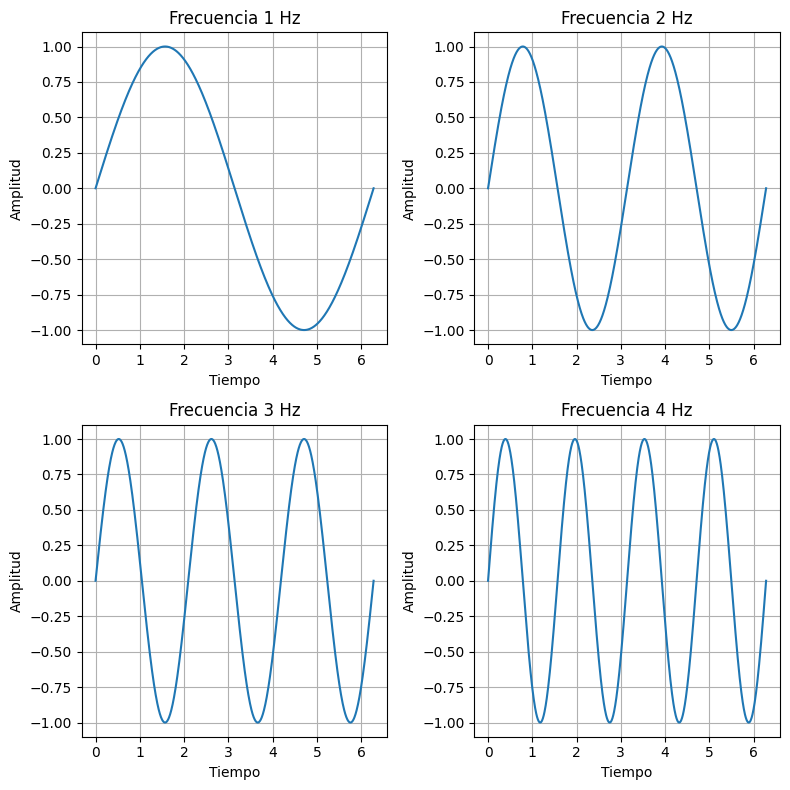

In [58]:
plt.figure(figsize=(8, 8))

for i, f in enumerate(frecuencias, 1):
    plt.subplot(2, 2, i)
    plt.plot(t, np.sin(f*t))
    plt.title(f"Frecuencia {f} Hz")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.grid(True)

plt.tight_layout()
plt.show()


## Red de nodos + Dijkstra

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math

# nodos Aleatorios

In [60]:
NUM_NODOS = 100
AREA = 100
RADIO = 14


def generar_nodos(n, area):
    nodos = {}
    for i in range(1, n + 1):
        x = random.uniform(0, area)
        y = random.uniform(0, area)
        nodos[i] = (x, y)
    return nodos


Grafo y los enlaces

In [61]:
def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


Nodo fuente con el destino

In [62]:
def construir_grafo(nodos, radio):
    grafo = {i: [] for i in nodos}

    for i in nodos:
        for j in nodos:
            if i != j:
                d = distancia(nodos[i], nodos[j])
                if d <= radio:
                    grafo[i].append((j, d))  # (nodo_vecino, costo)

    return grafo


# Algoritmo de dijkstra

In [63]:
def dijkstra(grafo, origen, destino):
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[origen] = 0
    padres = {nodo: None for nodo in grafo}
    visitados = set()

    while len(visitados) < len(grafo):
        nodo_actual = min(
            (n for n in grafo if n not in visitados),
            key=lambda n: distancias[n]
        )

        visitados.add(nodo_actual)

        if nodo_actual == destino:
            break

        for vecino, costo in grafo[nodo_actual]:
            if vecino not in visitados:
                nueva_dist = distancias[nodo_actual] + costo
                if nueva_dist < distancias[vecino]:
                    distancias[vecino] = nueva_dist
                    padres[vecino] = nodo_actual

    # Reconstruir ruta
    ruta = []
    nodo = destino
    while nodo is not None:
        ruta.insert(0, nodo)
        nodo = padres[nodo]

    return ruta, distancias[destino]


Dibujar la red con la ruta minima

In [64]:
def graficar_red(nodos, grafo, ruta):
    plt.figure(figsize=(8,8))

    # Dibujar enlaces
    for i in grafo:
        for j, _ in grafo[i]:
            x = [nodos[i][0], nodos[j][0]]
            y = [nodos[i][1], nodos[j][1]]
            plt.plot(x, y, 'gray', linewidth=0.5)

    # Dibujar nodos y etiquetas
    for i, (x, y) in nodos.items():
        plt.scatter(x, y, color='black')
        plt.text(x+0.5, y+0.5, str(i), fontsize=8)

    # Dibujar ruta mínima en rojo
    for k in range(len(ruta)-1):
        i = ruta[k]
        j = ruta[k+1]
        x = [nodos[i][0], nodos[j][0]]
        y = [nodos[i][1], nodos[j][1]]
        plt.plot(x, y, 'red', linewidth=2)

    plt.xlim(0, AREA)
    plt.ylim(0, AREA)
    plt.title("Red de 100 nodos y ruta mínima (Dijkstra)")
    plt.grid(True)
    plt.show()


Nodo fuente: 48
Nodo destino: 61
Ruta mínima: [48, 35, 56, 61]
Costo total: 35.780685540783466


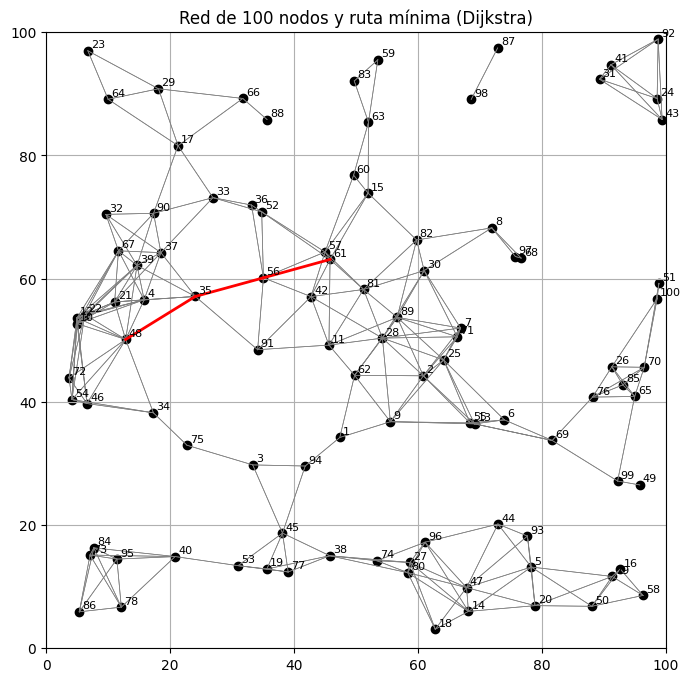

In [65]:
# Generar nodos
nodos = generar_nodos(NUM_NODOS, AREA)

# Construir grafo
grafo = construir_grafo(nodos, RADIO)

# Elegir fuente y destino distintos
origen, destino = random.sample(range(1, NUM_NODOS+1), 2)

print(f"Nodo fuente: {origen}")
print(f"Nodo destino: {destino}")

# Aplicar Dijkstra
ruta, costo_total = dijkstra(grafo, origen, destino)

print("Ruta mínima:", ruta)
print("Costo total:", costo_total)

# Graficar resultado
graficar_red(nodos, grafo, ruta)
